Step 1: Dataset Loading and Basic Overview
In this step, we will load the dataset, understand its features, check for missing values, and examine the basic structure of the data.

The dataset contains health parameters of 400 patients, some numerical and some categorical. The target column class indicates whether the patient has kidney disease or not.

In [1]:

import os
os.system('pip install pandas numpy matplotlib seaborn')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
df = pd.read_csv(r'd:\ml projects\kidney-disease-prediction\data\kidney_disease.csv')


In [5]:
print(df.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [6]:
print(f"Dataset shape: {df.shape}")

Dataset shape: (400, 26)


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
print(df.isnull().sum())

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [9]:
df.replace('?', np.nan, inplace=True)

In [10]:
cols_to_numeric = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 
                   'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

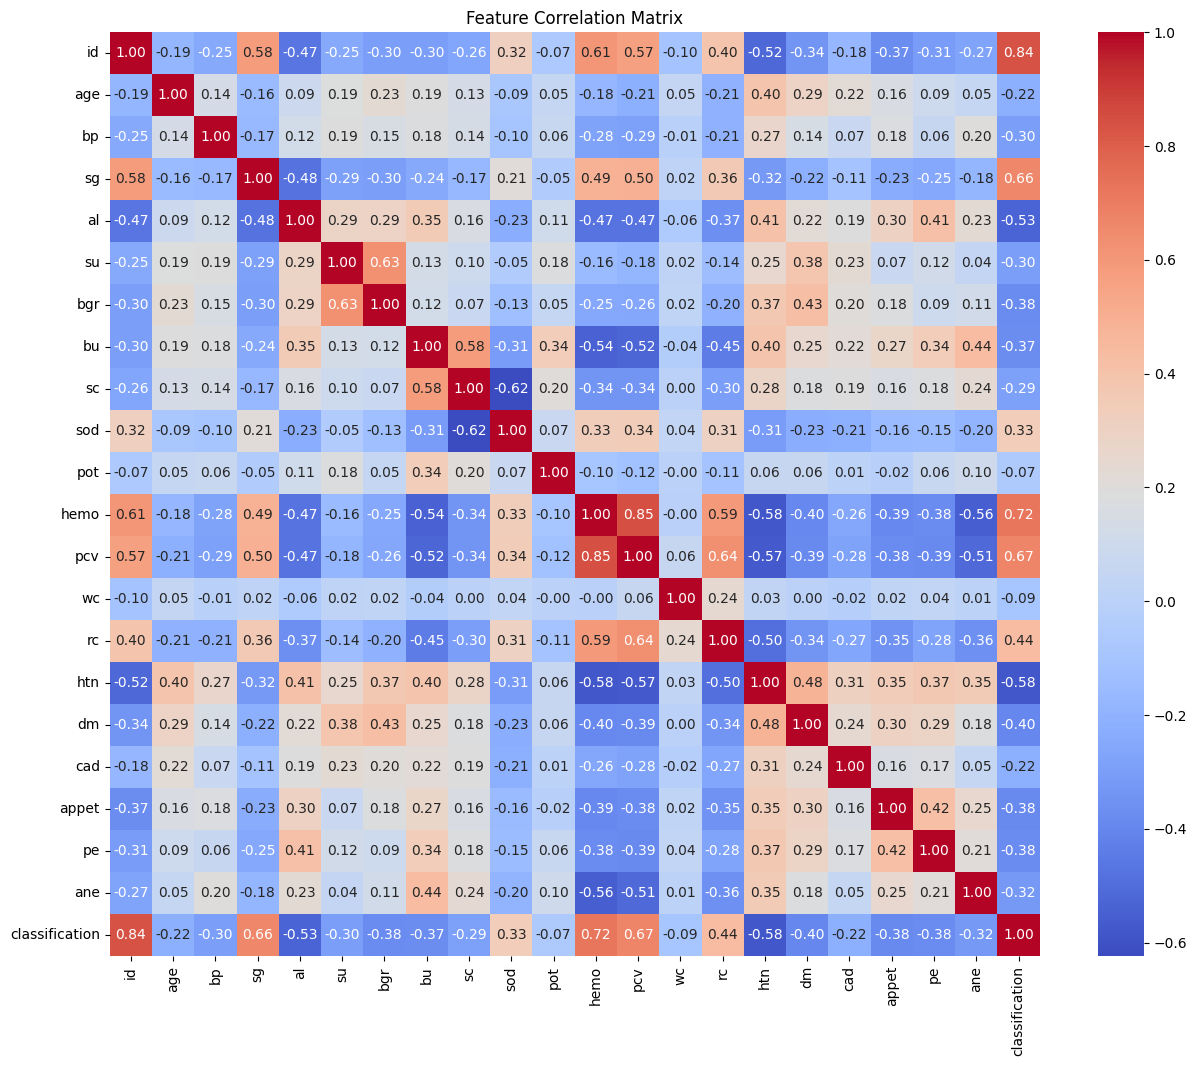

In [50]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()


In [13]:
print(df.columns)


Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


In [14]:
for col in cols_to_numeric:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f" Column '{col}' not found in dataset.")

 Column 'wbcc' not found in dataset.
 Column 'rbcc' not found in dataset.


In [15]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\visha\AppData\Local\Temp\ipykernel_32916\93522249.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [19]:
os.system('pip install scikit-learn')

from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [21]:
print(df.isnull().sum())

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               400
pc                400
pcc               400
ba                400
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                  0
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64


In [23]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
print("Missing Values per Column:")
print(missing_counts)



Missing Values per Column:
pcc               400
ba                400
pc                400
rbc               400
pot                88
sod                87
pcv                71
hemo               52
su                 49
sg                 47
al                 46
bgr                44
bu                 19
sc                 17
bp                 12
age                 9
id                  0
wc                  0
rc                  0
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64


In [24]:
cols_to_drop = ['pcc', 'ba', 'pc', 'rbc']
df.drop(columns=cols_to_drop, inplace=True)

In [25]:
cols_to_numeric = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


In [26]:
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [28]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [29]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [30]:
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
id                 0
age                0
bp                 0
sg                47
al                46
su                49
bgr                0
bu                 0
sc                 0
sod                0
pot                0
hemo               0
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64


In [31]:
df.replace('?', np.nan, inplace=True)

In [32]:
cat_cols = ['sg', 'al', 'su']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

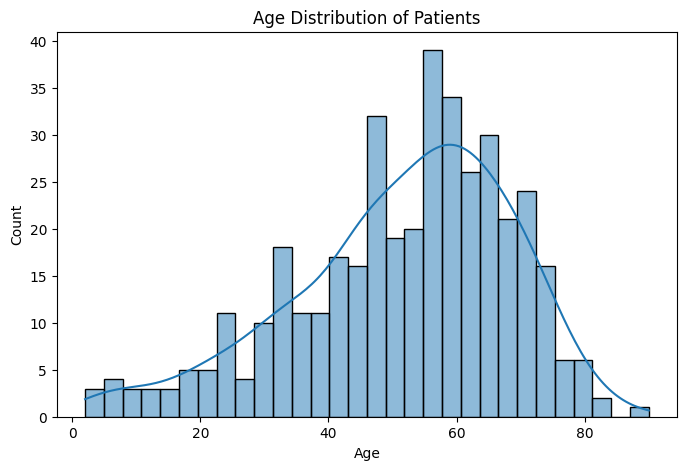

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


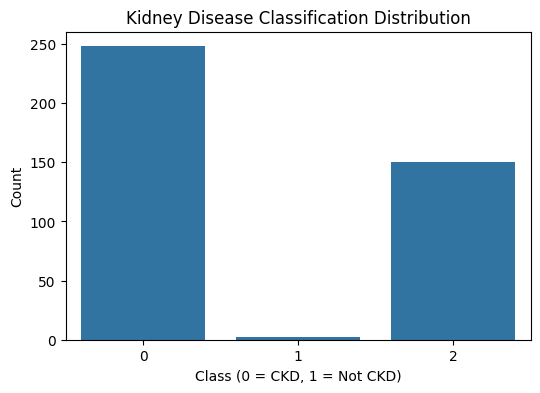

In [46]:
plt.figure(figsize=(6,4))
sns.countplot(x='classification', data=df)
plt.title('Kidney Disease Classification Distribution')
plt.xlabel('Class (0 = CKD, 1 = Not CKD)')
plt.ylabel('Count')
plt.show()


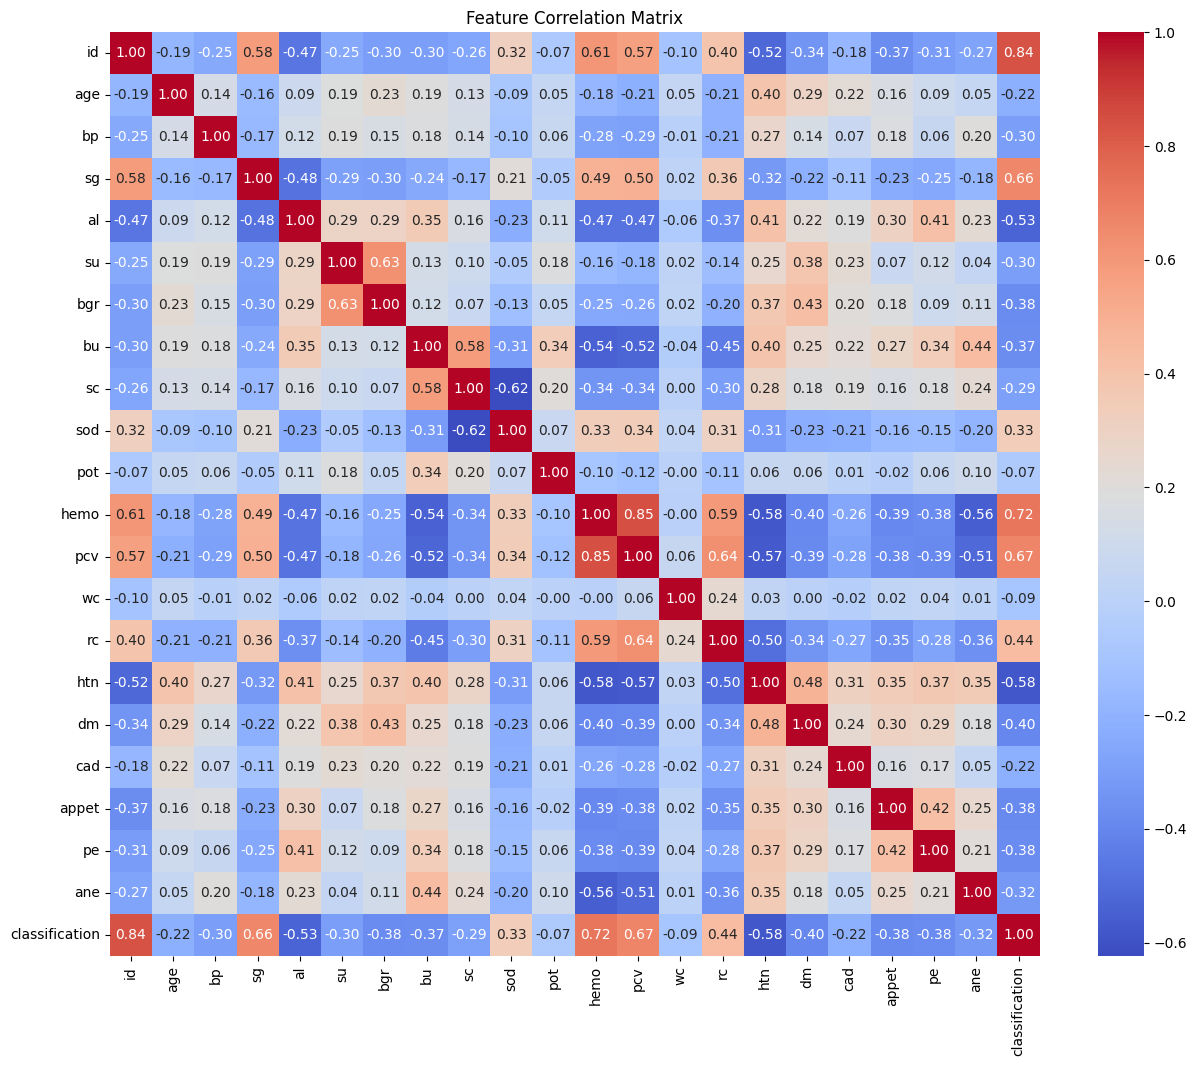

In [47]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()


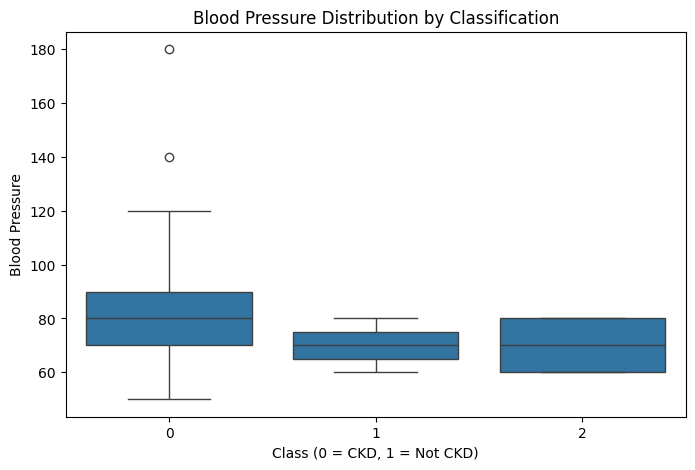

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='bp', data=df)
plt.title('Blood Pressure Distribution by Classification')
plt.xlabel('Class (0 = CKD, 1 = Not CKD)')
plt.ylabel('Blood Pressure')
plt.show()


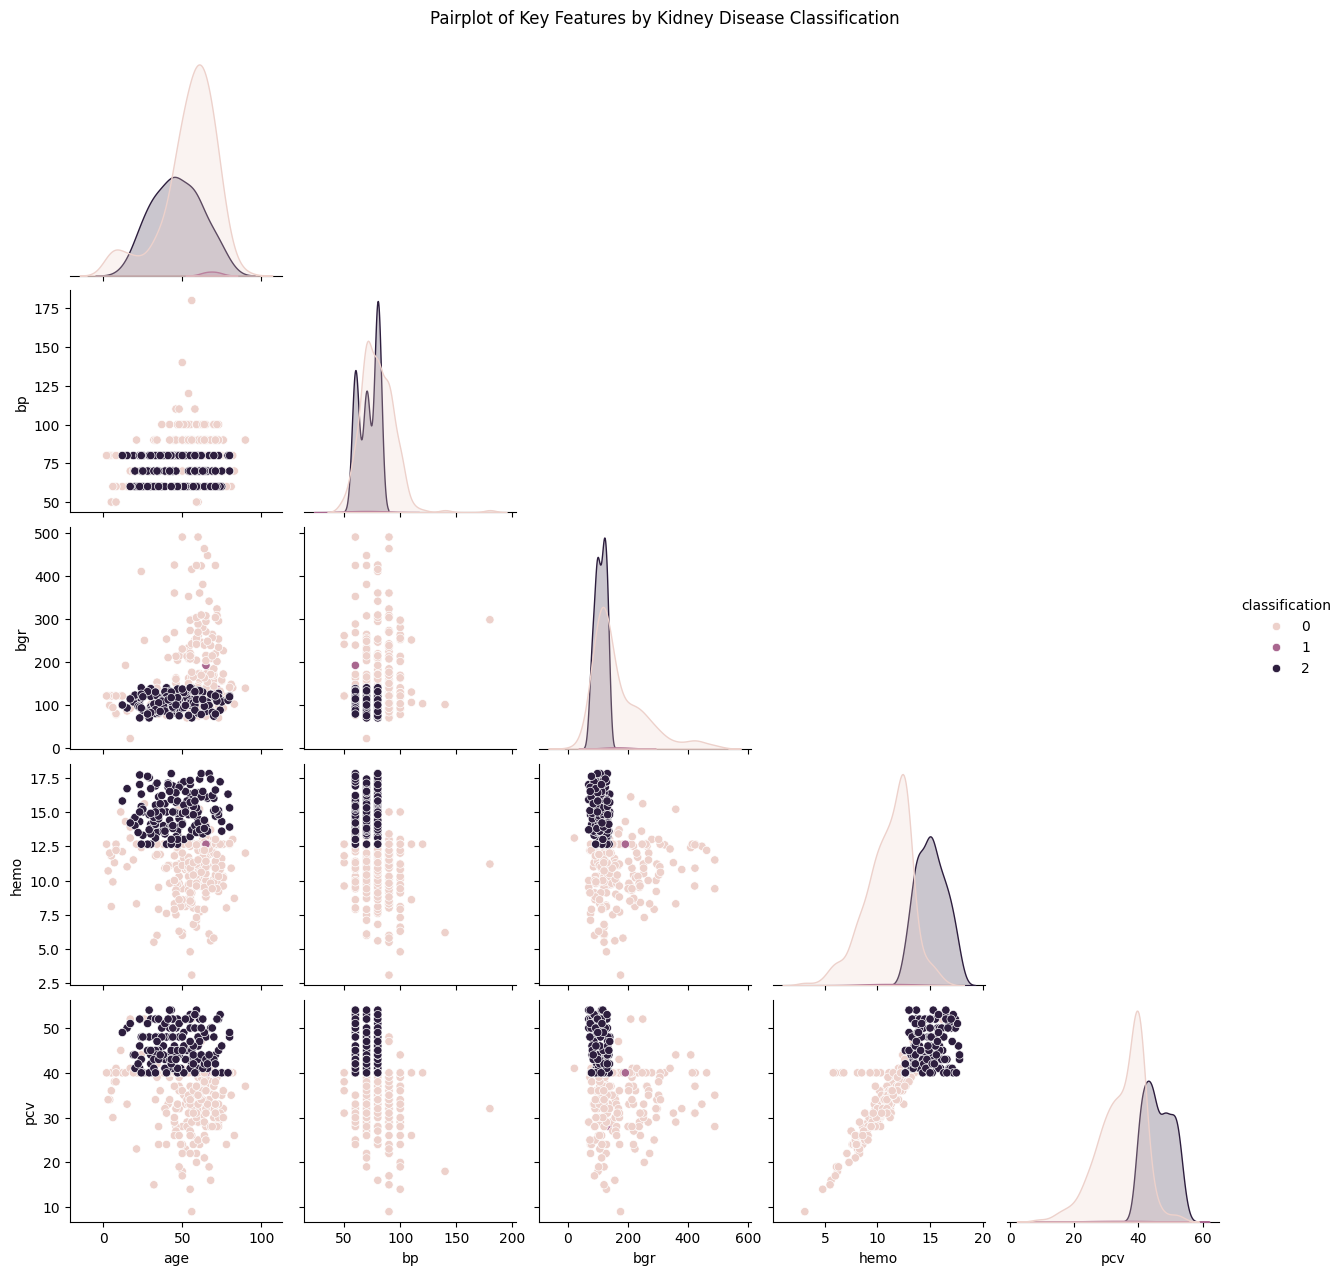

In [49]:
key_features = ['age', 'bp', 'bgr', 'hemo', 'pcv', 'classification']
sns.pairplot(df[key_features], hue='classification', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Features by Kidney Disease Classification', y=1.02)
plt.show()


In [36]:
import os
os.system('pip install scikit-learn xgboost')


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [37]:
X = df.drop(['id', 'classification'], axis=1)
y = df['classification']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [40]:
def train_evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model.__class__.__name__}: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

In [41]:
for model in [svm_model, rf_model, xgb_model]:
    train_evaluate_model(model)

Accuracy of SVC: 0.9000
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92        52
           2       0.79      0.96      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80

Confusion Matrix:
[[45  7]
 [ 1 27]]


Accuracy of RandomForestClassifier: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Confusion Matrix:
[[52  0]
 [ 0 28]]


Accuracy of XGBClassifier: 0.9875
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99

d:\ml projects\kidney-disease-prediction\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [03:12:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)


grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_


y_pred = best_rf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred))


d:\ml projects\kidney-disease-prediction\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Random Forest Accuracy: 1.0


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Best estimator from GridSearchCV use karte hain
best_rf = grid_search.best_estimator_

# 5-fold cross-validation accuracy scores
cv_scores = cross_val_score(best_rf, X, y, cv=5, scoring='accuracy', n_jobs=-1)

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard deviation of CV accuracy: {:.4f}".format(np.std(cv_scores)))


Cross-validation scores: [0.9875 1.     0.9625 0.975  0.9875]
Mean CV accuracy: 0.9825
Standard deviation of CV accuracy: 0.0127


d:\ml projects\kidney-disease-prediction\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [54]:
import os

if not os.path.exists('models'):
    os.makedirs('models')


import pickle
with open('models/best_rf_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

print("Model saved successfully in 'models/best_rf_model.pkl'.")


Model saved successfully in 'models/best_rf_model.pkl'.
